# UnSupervised Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from unsupervisedModels.kMeans import KMeansModel
from unsupervisedModels.DBSCAN import DBSCANModel, HDBSCANModel
from unsupervisedModels.GMM import GaussianMixtureModel
from unsupervisedModels.HierarchialClustering import HierarchicalClusteringModel
from Data_Processing import DataPreProcess
from sklearn.mixture import GaussianMixture

# Importing the Preprocessed Data

Initializing Data Preprocessing....

Detecting Nulls
The null in dataset are:
 NDVI01    0
NDVI02    0
NDVI03    0
NDVI04    0
NDVI05    0
NDVI06    0
NDVI07    0
NDVI08    0
NDVI09    0
NDVI10    0
NDVI11    0
NDVI12    0
label     0
year      0
dtype: int64
As there is no Null in Dataset so no removal us needed

Ploting BOX Plot for outliers
Adressing Outliers
Now verify the outliers

Applying Scalling
Data Processing is completed


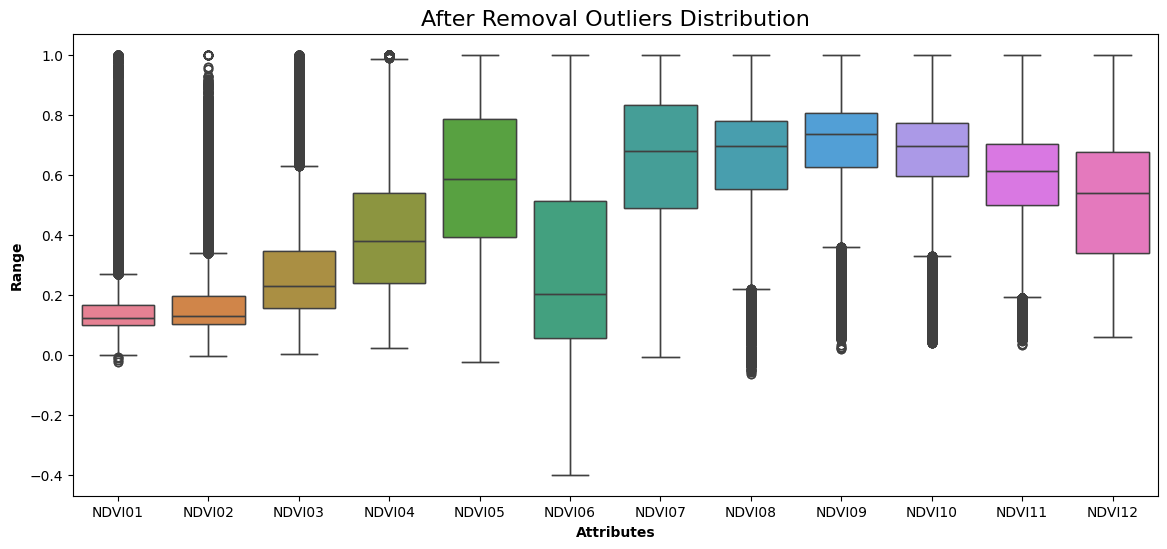

In [2]:
process=DataPreProcess()
features,labels=process.apply_unsupervised_processing()

# 1) K-Means Clustering 

- 1st we will implement the K-Means without PCA 
- After analyzing the performance without PCA we will apply PCA
- Lastly we will analyze with PCA performance

In [3]:
features.mean()

-1.448451471656638e-16

In [3]:
'''Initializing Data Dictionary'''
data={'X_train':features,'y_train':labels}

### K-Means Clustering Initialization for without PCA


In [4]:
'''Initializing KMeans model'''
kmeans_model = KMeans(
    n_clusters=2,              # Number of clusters
    init="k-means++",          # Intelligent centroid initialization
    n_init=20,                 # Increase number of initialization runs
    max_iter=300,              # Maximum number of iterations
    random_state=42            # Ensure reproducibility
)
'''Passing The KMeans model and data to our own KMeansModel class'''
kmeans_without_pca = KMeansModel(data, kmeans_model)


### K-Means Clustering without PCA
- Without PCA we got 60% cluster purity
- Classification report and confussion matrix for each class are given below
- These results shows data our model lacks on class 0 which is rice
- Here we got 60% accuracy but other matrices for rice are not so good let's try with PCA

Cluster Purity: 0.6089

Classification Report:
              precision    recall  f1-score   support

        Rice       0.10      0.14      0.12      6025
      Cotton       0.79      0.71      0.75     27071

    accuracy                           0.61     33096
   macro avg       0.44      0.43      0.43     33096
weighted avg       0.66      0.61      0.63     33096



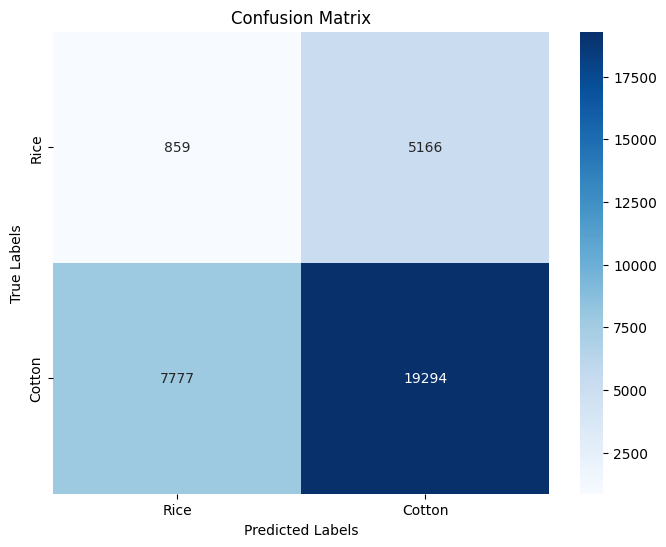

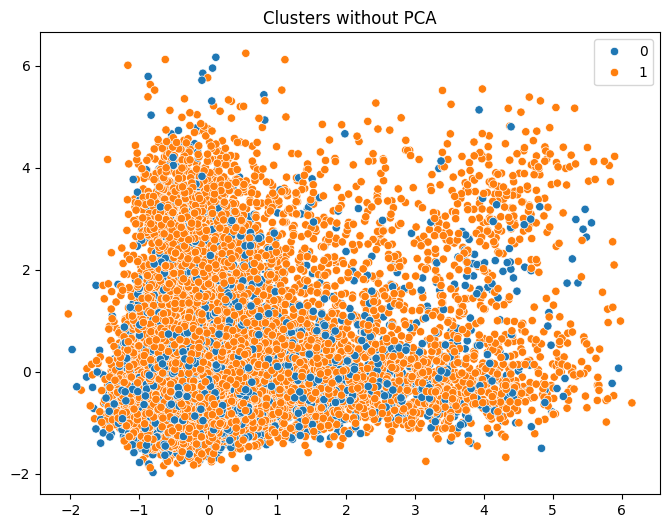

In [5]:
# Without PCA
results_without_pca = kmeans_without_pca.train_and_evaluate(use_pca=False)

### K-Means Clustering Initialization for with PCA


In [6]:
'''Initializing KMeans model'''
kmeans_model = KMeans(
    n_clusters=2,              # Number of clusters
    init="k-means++",          # Intelligent centroid initialization
    n_init=20,                 # Increase number of initialization runs
    max_iter=300,              # Maximum number of iterations
    random_state=42            # Ensure reproducibility
)
'''Passing The KMeans model and data to our own KMeansModel class'''
kmeans_with_pca = KMeansModel(data, kmeans_model)


### K-Means Clustering with PCA
- In this part we again got 60% cluster purity as without PCA
- But here we have compromised accuracy for other metrices like precision, recall, f1
- Our accuracy dropped to 40% but this model was able maintain balance between metrices for rice and cotton

Cluster Purity: 0.6084

Classification Report:
              precision    recall  f1-score   support

        Rice       0.21      0.86      0.34      6025
      Cotton       0.90      0.29      0.44     27071

    accuracy                           0.39     33096
   macro avg       0.56      0.57      0.39     33096
weighted avg       0.78      0.39      0.42     33096



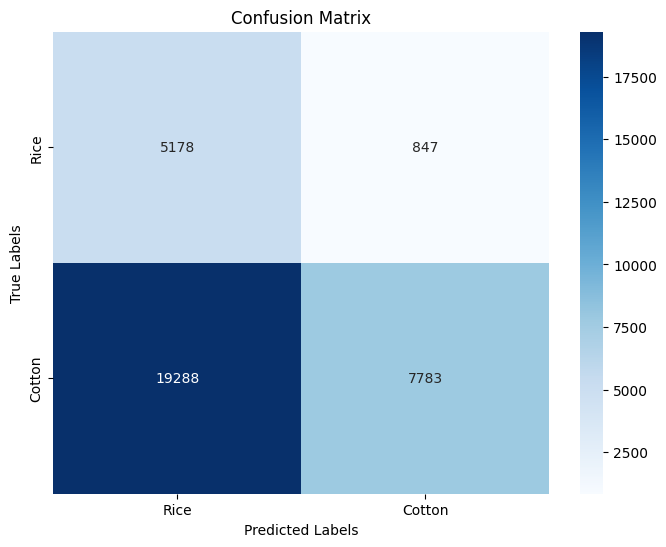

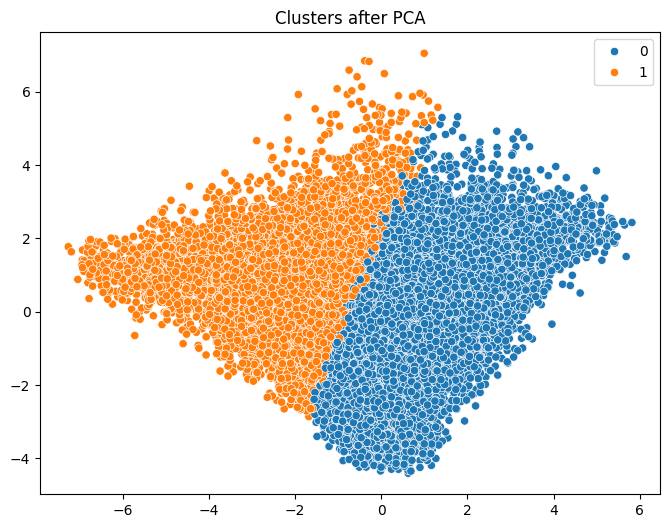

In [7]:
# With PCA
results_with_pca = kmeans_with_pca.train_and_evaluate(use_pca=True, n_components=8)

# 2) DBSCAN

### ELBOW Method

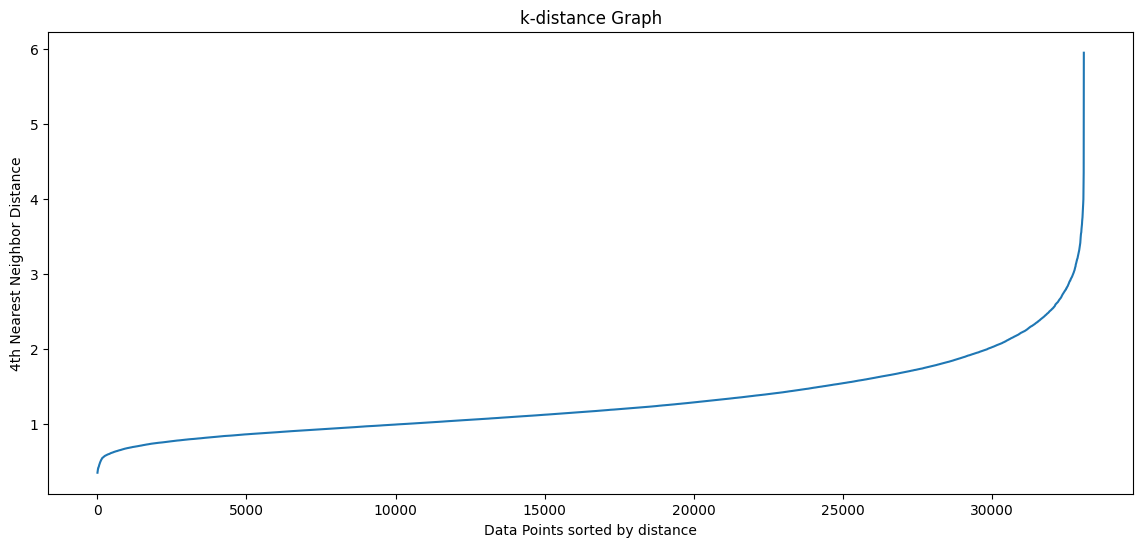

In [5]:
from sklearn.neighbors import NearestNeighbors


X = data["X_train"]
neigh = NearestNeighbors(n_neighbors=24)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances[:, 23], axis=0)
plt.plot(distances)
plt.title("k-distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


### DBSCAN Clustering Initialization for without PCA


In [14]:
# Initializing DBSCAN model
dbscan_model = DBSCAN(eps=2, min_samples=24) #2,24

# Passing the DBSCAN model and data to the DBSCANModel class
dbscan_without_pca = DBSCANModel(data, dbscan_model)

### DBSCAN Clustering without PCA

Cluster Purity: 0.8064

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.18      0.93      0.29      6025
           1       0.04      0.00      0.00     27071

    accuracy                           0.17     33096
   macro avg       0.07      0.31      0.10     33096
weighted avg       0.06      0.17      0.05     33096



C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


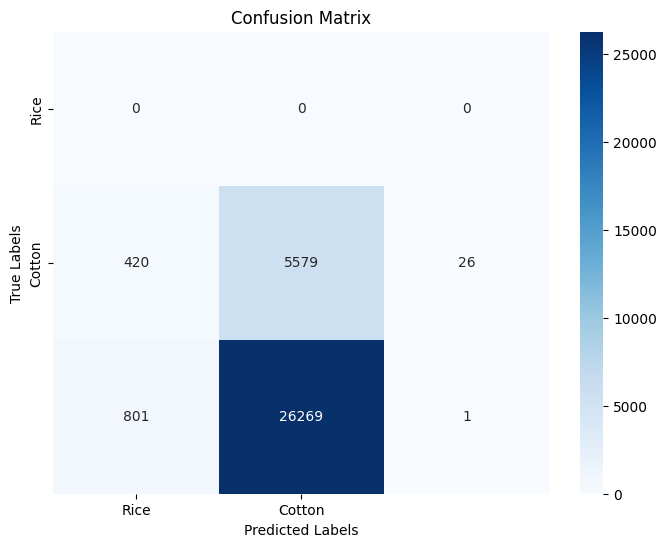

C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


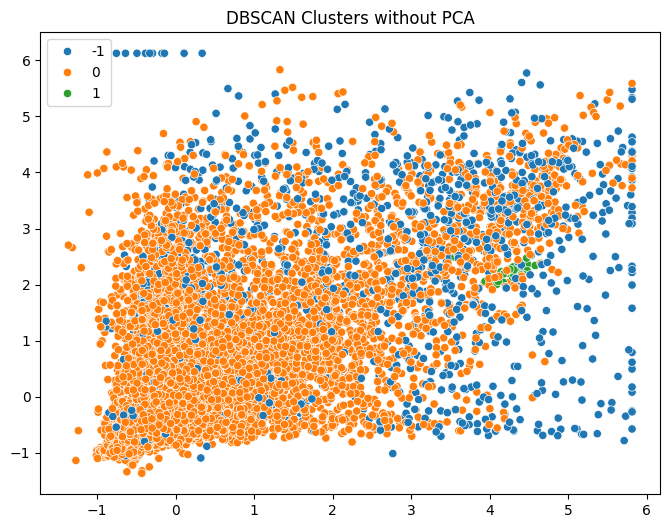

In [15]:
# Without PCA
db_results_without_pca = dbscan_without_pca.train_and_evaluate(use_pca=False)

### DBSCAN Clustering Initialization for with PCA



In [18]:
# Initializing DBSCAN model
dbscan_model = DBSCAN(eps=2, min_samples=24)

# Passing the DBSCAN model and data to the DBSCANModel class
dbscan_with_pca = DBSCANModel(data, dbscan_model)

### DBSCAN Clustering with PCA

Cluster Purity: 0.8140

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.18      0.98      0.30      6025
           1       0.00      0.00      0.00     27071

    accuracy                           0.18     33096
   macro avg       0.06      0.33      0.10     33096
weighted avg       0.03      0.18      0.06     33096



C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

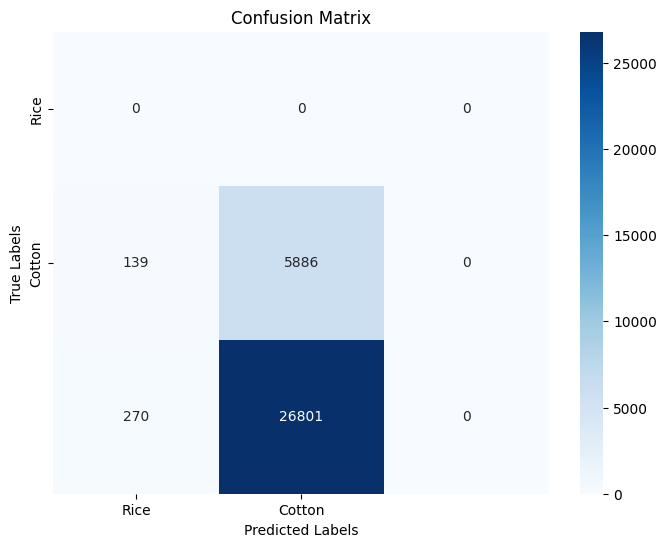

C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

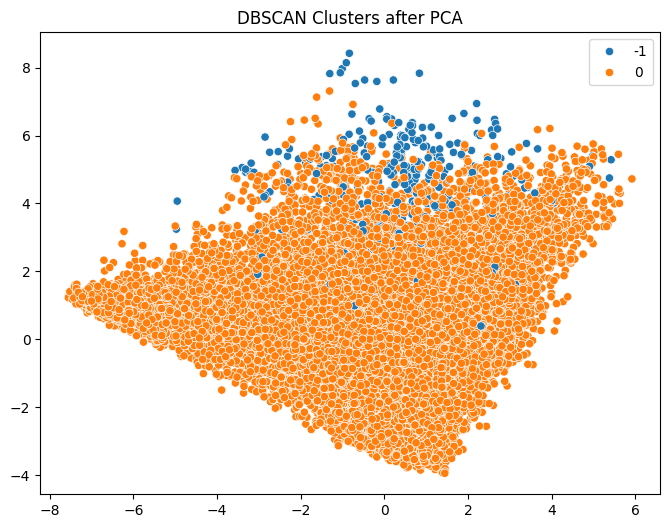

In [19]:
# With PCA
db_results_with_pca = dbscan_with_pca.train_and_evaluate(use_pca=True,n_components=8)

# 3) GMM

### GMM Clustering Initialization for without PCA


In [5]:
gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_without_pca = GaussianMixtureModel(data, gmm_model)

### DBSCAN Clustering without PCA

Cluster Purity: 0.6528

Classification Report:
              precision    recall  f1-score   support

        Rice       0.28      0.59      0.38      6025
      Cotton       0.88      0.67      0.76     27071

    accuracy                           0.65     33096
   macro avg       0.58      0.63      0.57     33096
weighted avg       0.77      0.65      0.69     33096



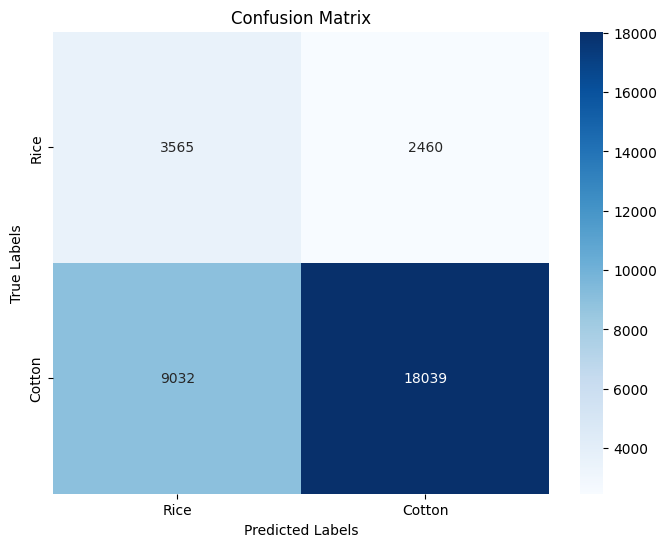

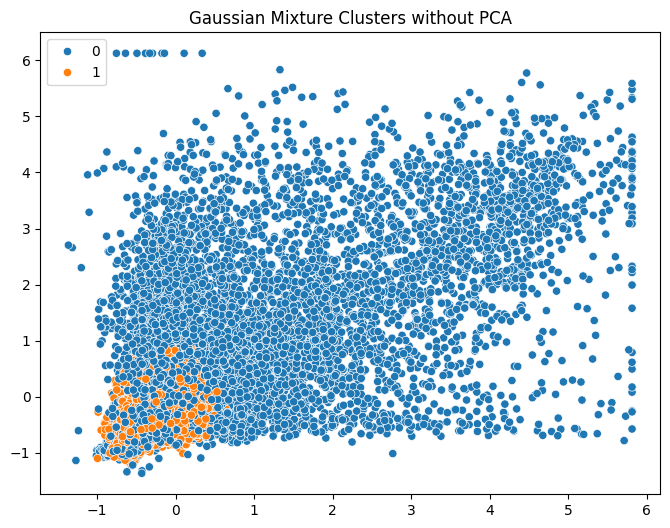

In [6]:
# Without PCA
gmm_results_without_pca = gmm_without_pca.train_and_evaluate(use_pca=False)

### GMM Clustering Initialization for with PCA


In [19]:
gmm_model = GaussianMixture(n_components=2, random_state=42)
gmm_with_pca = GaussianMixtureModel(data, gmm_model)

### GMM Clustering with PCA

Cluster Purity: 0.6676

Classification Report:
              precision    recall  f1-score   support

        Rice       0.30      0.60      0.40      6025
      Cotton       0.89      0.68      0.77     27071

    accuracy                           0.67     33096
   macro avg       0.59      0.64      0.58     33096
weighted avg       0.78      0.67      0.70     33096



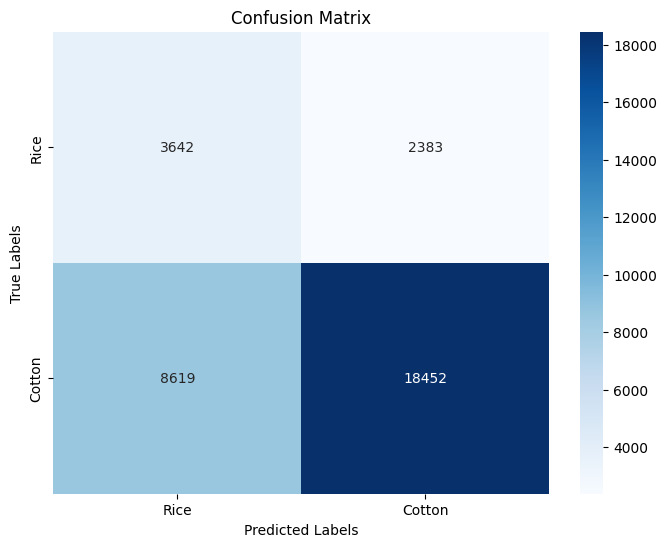

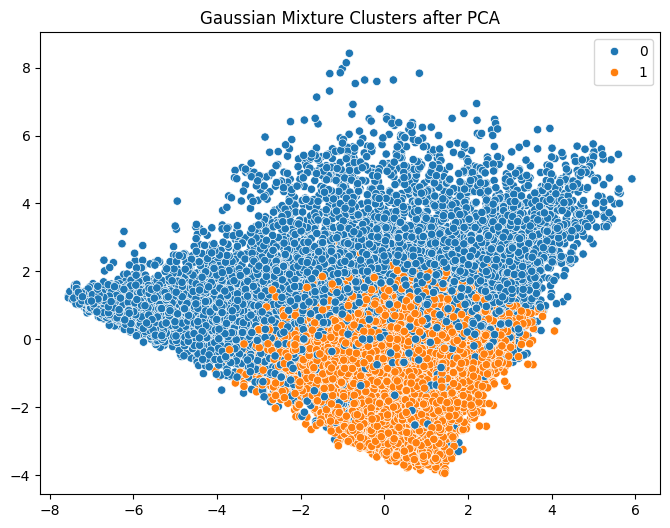

In [20]:
# With PCA
gmm_results_with_pca = gmm_with_pca.train_and_evaluate(use_pca=True,n_components=10)

# 4) Hierarchical Clustering

### Hierarchial Clustering Initialization for without PCA


In [7]:
hierarchical_without_pca = HierarchicalClusteringModel(data)

In [8]:
y=data.get("y_train")
print(len(np.unique(y)))

2


### Hierarchial Clustering without PCA

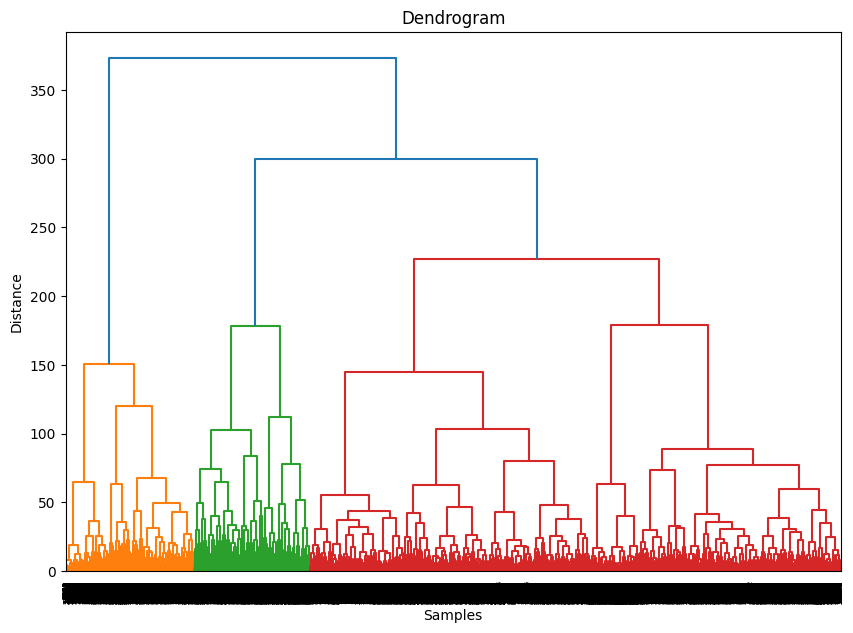

Cluster Purity: 0.6883

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6025
           1       0.89      0.18      0.30     27071
           2       0.00      0.00      0.00         0

    accuracy                           0.15     33096
   macro avg       0.30      0.06      0.10     33096
weighted avg       0.73      0.15      0.25     33096



C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

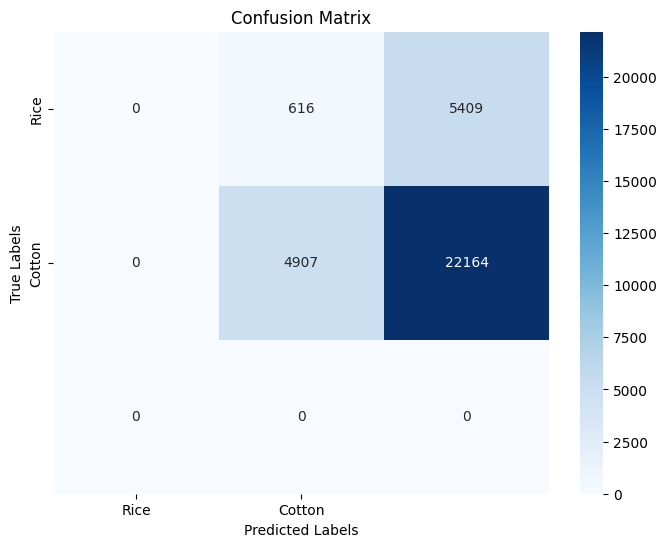

C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

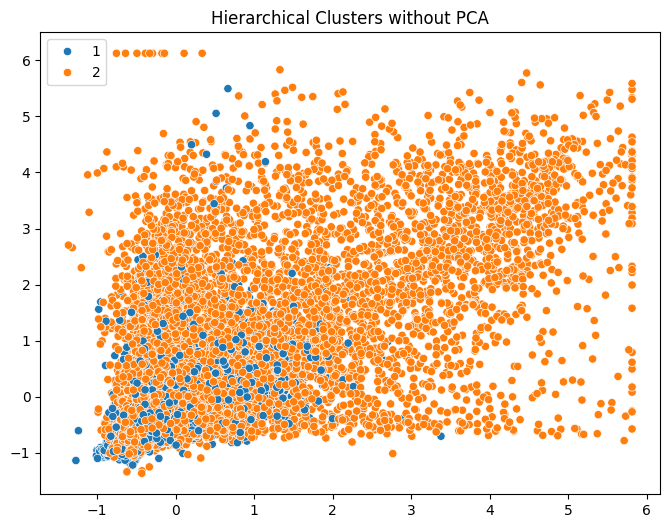

In [9]:
hierarchical_results_without_pca=hierarchical_without_pca.train_and_evaluate(linkage_method="ward", use_pca=False)

### Hierarchial Clustering Initialization for with PCA


In [11]:
hierarchical_with_pca = HierarchicalClusteringModel(data)

### Hierarchial Clustering with PCA

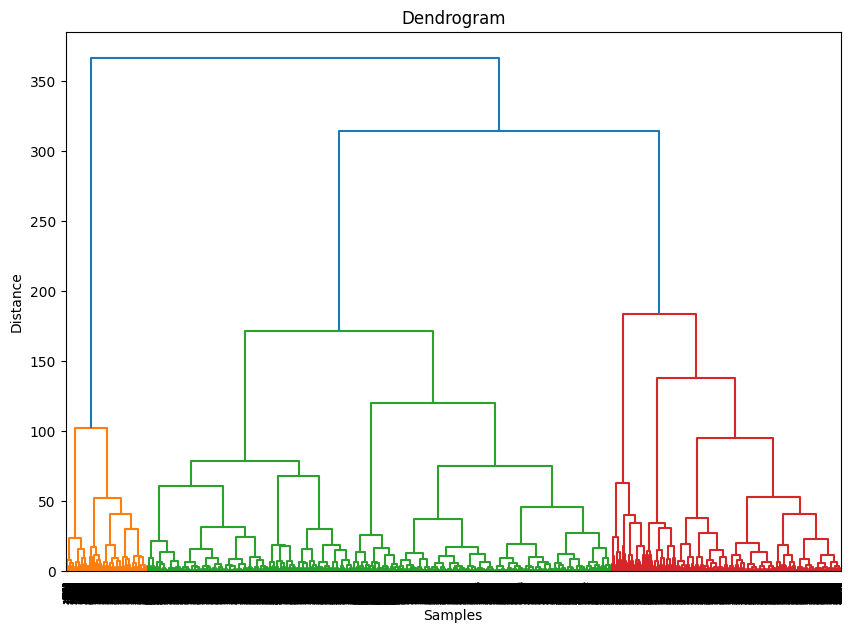

Cluster Purity: 0.7223

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6025
           1       0.95      0.12      0.22     27071
           2       0.00      0.00      0.00         0

    accuracy                           0.10     33096
   macro avg       0.32      0.04      0.07     33096
weighted avg       0.78      0.10      0.18     33096



C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

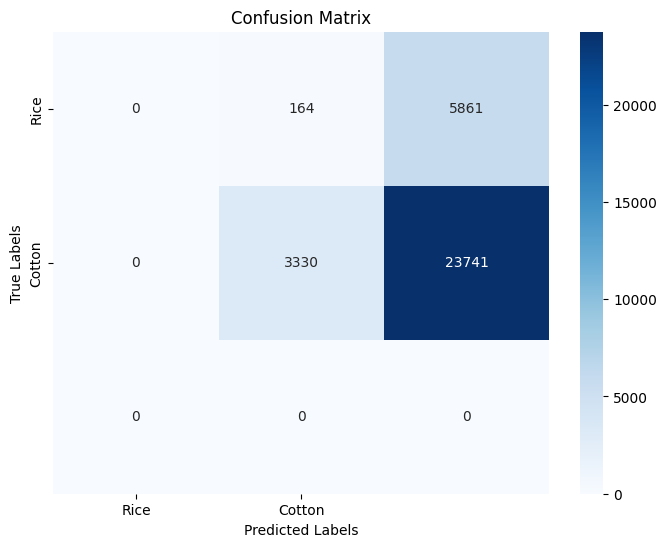

C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

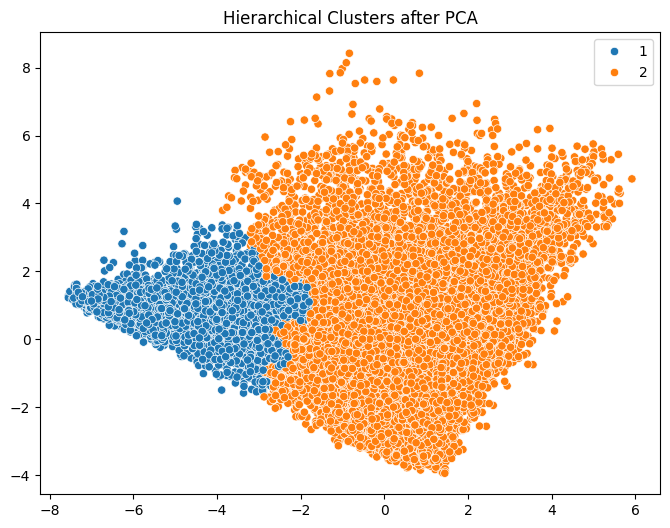

In [12]:
hierarchical_results_with_pca=hierarchical_with_pca.train_and_evaluate(linkage_method="ward", use_pca=True,n_components=2)